In [16]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
    
#func for getting data, creating vocabulary and creating binary vectors for training and testing
#getting data from database, and indexing it in to words
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)#importing data,y->0 for negative 1 for postitive.
word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())#indexing words
index2word[0] = '[pad]'
index2word[1] = '[bos]' 
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])#final train data
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])#final test data
#vocabulary: Add all words to a set
vocabulary = list()
for text in x_train:
    tokens = text.split()
    vocabulary.extend(tokens)
vocabulary = set(vocabulary)#final vocabulary set
print(len(vocabulary))
#vectoring: If word is in the review 1, if not 0
x_train_binary = list()
x_test_binary = list()
for text in tqdm(x_train):#vectoring training data
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)
x_train_binary = np.array(x_train_binary)
for text in tqdm(x_test):#vectoring  test data
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)
x_test_binary = np.array(x_test_binary)   




3998


100%|██████████| 25000/25000 [05:38<00:00, 73.94it/s]


In [17]:
def fit(x_train_binary,y_train):
  prob_11=list()#probability of word existing and positive review
  total=0#total words
  for word in range(len(vocabulary)):#checking every work in vocab 
    counter=0#counter for specific word 
    for review in range(len(x_train_binary)):
      if(x_train_binary[review][word]==1 and y_train[review]==1):
        counter+=1
        total+=1
    prob_11.append(counter)#for every word in the vocab we have a counter on the cases is appeared and the review was positive
  for word in range(len(prob_11)):
    prob_11[word]=np.log((prob_11[word]+1)/(total+4000)) #generating loged probabilities for each word (diafaneies)
  prob_10=list()#probability of word existing and positive review
  total=0#total words
  for word in range(len(vocabulary)):#checking every work in vocab 
    counter=0#counter for specific word 
    for review in range(len(x_train_binary)):
      if(x_train_binary[review][word]==1 and y_train[review]==0):
        counter+=1
        total+=1
    prob_10.append(counter)#for every word in the vocab we have a counter on the cases is appeared and the review was positive
  for word in range(len(prob_10)):
    prob_10[word]=np.log((prob_10[word]+1)/(total+4000)) #generating loged probabilities for each word (diafaneies)
  prob_01=list()#probability of word existing and positive review
  total=0#total words
  for word in range(len(vocabulary)):#checking every work in vocab 
    counter=0#counter for specific word 
    for review in range(len(x_train_binary)):
      if(x_train_binary[review][word]==0 and y_train[review]==1):
        counter+=1
        total+=1
    prob_01.append(counter)#for every word in the vocab we have a counter on the cases is appeared and the review was positive
  for word in range(len(prob_01)):
    prob_01[word]=np.log((prob_01[word]+1)/(total+4000)) #generating loged probabilities for each word (diafaneies)
  prob_00=list()#probability of word existing and positive review
  total=0#total words
  for word in range(len(vocabulary)):#checking every work in vocab 
    counter=0#counter for specific word 
    for review in range(len(x_train_binary)):
      if(x_train_binary[review][word]==0 and y_train[review]==0):
        counter+=1
        total+=1
    prob_00.append(counter)#for every word in the vocab we have a counter on the cases is appeared and the review was positive
  for word in range(len(prob_00)):
    prob_00[word]=np.log((prob_00[word]+1)/(total+4000)) #generating loged probabilities for each word (diafaneies)
  return prob_00,prob_01,prob_10,prob_11

In [18]:
from operator import pos
from sklearn.metrics import classification_report
lists=fit(x_train_binary,y_train)



In [19]:
def predict_print(prob_00,prob_01,prob_10,prob_11,x_test_binary):
  predictions=list()#list for predictions to be made
  for review in x_test_binary:#for each review we will check each word and generate a probability for the outcome
    neg_prob=np.log(0.5)#starting probabilities
    pos_prob=np.log(0.5)
    for word in range(len(review)):#checking each word
      if (review[word]==0):#2 cases,word exists or word doesnt exist
        neg_prob+=prob_00[word]#2 cases,positive or negative review
        pos_prob+=prob_01[word]
      else:
        neg_prob+=prob_10[word]
        pos_prob+=prob_11[word]
    if (neg_prob>pos_prob):#checking highest probability
      predictions.append(0)
    elif(pos_prob>neg_prob):
      predictions.append(1)
    else: #if we generate the same probability, assume the review is positive
      predictions.append(1)
  print(classification_report(y_test, predictions, labels=[0, 1]))
def predict(prob_00,prob_01,prob_10,prob_11,x_test_binary):
  predictions=list()#list for predictions to be made
  for review in x_test_binary:#for each review we will check each word and generate a probability for the outcome
    neg_prob=np.log(0.5)#starting probabilities
    pos_prob=np.log(0.5)
    for word in range(len(review)):#checking each word
      if (review[word]==0):#2 cases,word exists or word doesnt exist
        neg_prob+=prob_00[word]#2 cases,positive or negative review
        pos_prob+=prob_01[word]
      else:
        neg_prob+=prob_10[word]
        pos_prob+=prob_11[word]
    if (neg_prob>pos_prob):#checking highest probability
      predictions.append(0)
    elif(pos_prob>neg_prob):
      predictions.append(1)
    else: #if we generate the same probability, assume the review is positive
      predictions.append(1)
  return predictions


In [20]:
predict_print(lists[0],lists[1],lists[2],lists[3],x_test_binary)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [21]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(x_train_binary, y_train)
print(classification_report(y_test, nb.predict(x_test_binary)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12500
           1       0.84      0.84      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [22]:
from sklearn.model_selection import train_test_split
x_train_binary, x_dev_binary, y_train, y_dev = train_test_split(x_train_binary, y_train,test_size=0.3)

(3500, 3998)
(3500,)
(7000, 3998)
(7000,)
(10500, 3998)
(10500,)
(14000, 3998)
(14000,)
(17500, 3998)
(17500,)


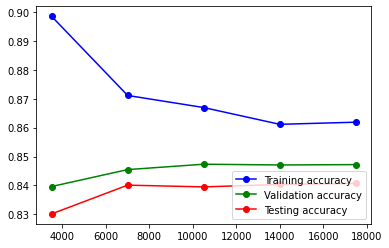

In [23]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def custom_learning_curve(x_train_binary, y_train,
                          x_dev_binary, y_dev, x_test_binary, y_test_binary,
                          n_splits):
  split_size = int(len(x_train_binary) / n_splits)
  x_splits = np.split(x_train_binary, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  lists=fit(curr_x,curr_y)
  predictions=predict(lists[0],lists[1],lists[2],lists[3],curr_x)
  train_accuracies.append(accuracy_score(curr_y,predictions))
  predictions=predict(lists[0],lists[1],lists[2],lists[3],x_dev_binary)
  val_accuracies.append(accuracy_score(y_dev, predictions))
  predictions=predict(lists[0],lists[1],lists[2],lists[3],x_test_binary)
  test_accuracies.append(accuracy_score(y_test, predictions))

  for i in range(1, len(x_splits)):
    
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    lists=fit(curr_x,curr_y)
    predictions=predict(lists[0],lists[1],lists[2],lists[3],curr_x)
    train_accuracies.append(accuracy_score(curr_y, predictions))
    predictions=predict(lists[0],lists[1],lists[2],lists[3],x_dev_binary)
    val_accuracies.append(accuracy_score(y_dev, predictions))
    predictions=predict(lists[0],lists[1],lists[2],lists[3],x_test_binary)
    test_accuracies.append(accuracy_score(y_test, predictions))

  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curve(x_train_binary, y_train,
                      x_dev_binary, y_dev, x_test_binary,
                      y_test, n_splits=5)

(3500, 3998)
(3500,)
(7000, 3998)
(7000,)
(10500, 3998)
(10500,)
(14000, 3998)
(14000,)
(17500, 3998)
(17500,)


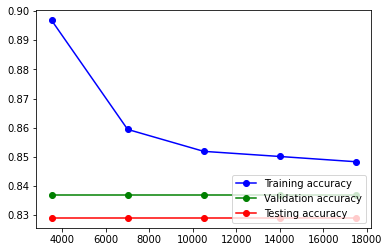

In [24]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def custom_learning_curveΒ(x_train_binary, y_train,
                          x_dev_binary, y_dev, x_test_binary, y_test_binary,
                          n_splits):
  split_size = int(len(x_train_binary) / n_splits)
  x_splits = np.split(x_train_binary, n_splits) # must be equal division
  y_splits = np.split(y_train, n_splits)
  train_accuracies = list()
  val_accuracies = list()
  test_accuracies = list()
  curr_x = x_splits[0]
  print(curr_x.shape)
  curr_y = y_splits[0]
  print(curr_y.shape)
  nb.fit(curr_x,curr_y)
  train_accuracies.append(accuracy_score(curr_y,nb.predict(curr_x)))
  val_accuracies.append(accuracy_score(y_dev, nb.predict(x_dev_binary)))
  test_accuracies.append(accuracy_score(y_test, nb.predict(x_test_binary)))
  for i in range(1, len(x_splits)):
    curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
    print(curr_x.shape)
    curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)
    print(curr_y.shape)
    train_accuracies.append(accuracy_score(curr_y, nb.predict(curr_x)))
    val_accuracies.append(accuracy_score(y_dev, nb.predict(x_dev_binary)))
    test_accuracies.append(accuracy_score(y_test, nb.predict(x_test_binary)))

  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), train_accuracies, 'o-', color="b",
             label="Training accuracy")
  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), val_accuracies, 'o-', color="green",
           label="Validation accuracy")
  plt.plot(list(range(split_size, len(x_train_binary) + split_size, 
                      split_size)), test_accuracies, 'o-', color="red",
           label="Testing accuracy")
  plt.legend(loc="lower right")
  plt.show()

custom_learning_curveΒ(x_train_binary, y_train,
                      x_dev_binary, y_dev, x_test_binary,
                      y_test, n_splits=5)